# Тема 5.1 Сверточные нейронные сети. Практика 1.


## Задание: Выполните весь код, который приведен ниже в этом файле, можете поэкспериментировать с выбором различных значений, после этого сохраните и загрузите полученный файл в систему.

<h2 style="text-align: center;"><b>Convolution и Pooling операции</b></h2>

### Convolution (свёртка)

На этом семинаре мы посмотрим, как свёртки влияют на изображение и попрактикуемся в вычислении свёрток и пулингов от различных изображений.

Для начала вспомним, что такое свёртка:

<img src="https://neurohive.io/wp-content/uploads/2018/07/convolutional-neural-network.gif" width=450 height=400>

То есть мы берём фильтр размера FxF, умножаем его на область изображения размером FxF поэлементно, складываем получившееся поэлемнетное произведение и записываем это число в результирующий тензор. Сама операция немного напоминает скалярное произведение, только для тензоров.

Если картинка размера HxWx3, то фильтр будет размер FxFx3, и поэлементное произведение будет по всему объёму, то есть третья размерность фильтра всегда свопадает с третьей размерностью входного тензора (не считая MobileNet, там есть depthwise separable convolution).

Напомним, что stride -- это размер шага окна свёртка по осям x и y (обычно совпадают, но вполне могут быть и разными). 

---

Посмотрим на то, как применение свёртки с определёнными фильтрами влияет на изображение.

Посмотрим, как будет меняться картинка в зависимости от фильтра:

In [0]:
#! wget https://www.kotzendes-einhorn.de/blog/wp-content/uploads/2011/01/lenna.jpg

In [0]:
from PIL import Image
from math import ceil, sqrt
from math import floor

import matplotlib.pyplot as plt
import numpy as np

In [0]:
def convolution(a, b):
    sum = 0
    for i in range(len(a)):
        for j in range(len(a[0])):
            sum += a[i][j] * b[i][j]
    return sum

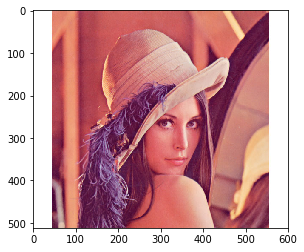

In [0]:
img = Image.open('./lenna.jpg')
pixels = img.load()

plt.imshow(img);

In [0]:
img_convolved = img.copy()
pixels2 = img_convolved.load()

Заготовим несколько фильтров:

In [0]:
'''
filter = [
    [-1, -1, 0, 0, 0],
    [0, -1, -1, -1, 0],
    [0, -1, 9, -1, 0],
    [0, -1, -1, -1, 0],
    [0, 0, 0, 0, 0]
]
'''

filter = [
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 4, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
]

'''
filter = [
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0]
]
'''

'''
filter = [
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
]
'''

'''
filter = [
    [0.5, 1.5, 2, 1.5, 0.5],
    [1.5, 3.5, 5, 3.5, 1.5],
    [  2,   5, 10,  5,   2],
    [1.5, 3.5, 5, 3.5, 1.5],
    [0.5, 1.5, 2, 1.5, 0.5]
]
''';

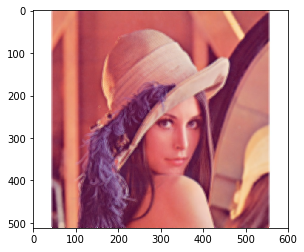

In [0]:
div = 0
for i in range(len(filter)):
    for j in range(len(filter[0])):
        div += filter[i][j]
if div == 0:
    div = 1

for i in range(floor(len(filter)/2), img.width - floor(len(filter)/2)):
    for j in range(floor(len(filter)/2), img.height - floor(len(filter)/2)):
        matrR = []
        matrG = []
        matrB = []
        for n in range(-floor(len(filter)/2), ceil(len(filter)/2)):
            rowR = []
            rowG = []
            rowB = []
            for m in range(-floor(len(filter)/2), ceil(len(filter)/2)):
                r, g, b = pixels[i + n, j + m]
                rowR.append(r)
                rowG.append(g)
                rowB.append(b)
            matrR.append(rowR)
            matrG.append(rowG)
            matrB.append(rowB)

        r = np.clip(round(convolution(matrR, filter) / div), 0, 255)
        g = np.clip(round(convolution(matrG, filter) / div), 0, 255)
        b = np.clip(round(convolution(matrB, filter) / div), 0, 255)

        pixels2[i, j] = (r, g, b)

plt.imshow(img_convolved);

Попробуем поменять фильтр и посмотреть, что будет.

In [0]:
filter = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]

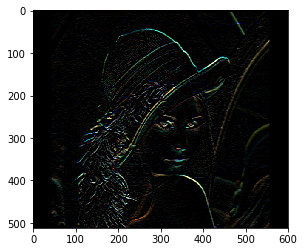

In [0]:
div = 0
for i in range(len(filter)):
    for j in range(len(filter[0])):
        div += filter[i][j]
if div == 0:
    div = 1

for i in range(floor(len(filter)/2), img.width - floor(len(filter)/2)):
    for j in range(floor(len(filter)/2), img.height - floor(len(filter)/2)):
        matrR = []
        matrG = []
        matrB = []
        for n in range(-floor(len(filter)/2), ceil(len(filter)/2)):
            rowR = []
            rowG = []
            rowB = []
            for m in range(-floor(len(filter)/2), ceil(len(filter)/2)):
                r, g, b = pixels[i + n, j + m]
                rowR.append(r)
                rowG.append(g)
                rowB.append(b)
            matrR.append(rowR)
            matrG.append(rowG)
            matrB.append(rowB)

        r = np.clip(round(convolution(matrR, filter) / div), 0, 255)
        g = np.clip(round(convolution(matrG, filter) / div), 0, 255)
        b = np.clip(round(convolution(matrB, filter) / div), 0, 255)

        pixels2[i, j] = (r, g, b)

plt.imshow(img_convolved);

---

In [0]:
filter = [
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
]

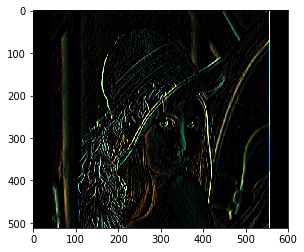

In [0]:
div = 0
for i in range(len(filter)):
    for j in range(len(filter[0])):
        div += filter[i][j]
if div == 0:
    div = 1

for i in range(floor(len(filter)/2), img.width - floor(len(filter)/2)):
    for j in range(floor(len(filter)/2), img.height - floor(len(filter)/2)):
        matrR = []
        matrG = []
        matrB = []
        for n in range(-floor(len(filter)/2), ceil(len(filter)/2)):
            rowR = []
            rowG = []
            rowB = []
            for m in range(-floor(len(filter)/2), ceil(len(filter)/2)):
                r, g, b = pixels[i + n, j + m]
                rowR.append(r)
                rowG.append(g)
                rowB.append(b)
            matrR.append(rowR)
            matrG.append(rowG)
            matrB.append(rowB)

        r = np.clip(round(convolution(matrR, filter) / div), 0, 255)
        g = np.clip(round(convolution(matrG, filter) / div), 0, 255)
        b = np.clip(round(convolution(matrB, filter) / div), 0, 255)

        pixels2[i, j] = (r, g, b)

plt.imshow(img_convolved);

Более эффективная реализация алгоритма свёртки будет приведена в другом ноутбуке.

Давайте немного потренируемся в вычислении размера результата применения свёртки к картинке:

Вычислим размер результата после применения свёртки Здесь $I$ -- размеры входного изображения, $f$ -- размеры фильтра:

$I$ = (50, 50, 3), $f$ = (3, 3, 3), $stride$ = 1. Вычисляем:  
по ширине: 50 - 3 + 1 = 48,  
по высоте: 50 - 3 + 1 = 48,   
то есть размер результата будет (48, 48, 1)

---

**Упражнение:**

Попробуйте самостоятельно вычислить размеры для следующих двух случаев:

1). $I$ = (1024, 768, 3), $f$=(5,5), $stride$ = 2

2). $I$ = (500, 700, 5), $f$=(7,4), $stride$ = 2

Напомним, что $padding$ -- это окружение картинки нулями (или чем-то другим) для того, чтобы придать изображению после свёртки нужный размер (пэддинг делается до свёртки).

Попробуйте самостоятельно прийти к общей формуле для $I$ = (H, W, C), $f$=(F, F), которая была на лекции (с учётом padding).

---

### Pooling

Pooling (пулинг) -- операция, нужная для уменьшения размерности по ширине и по высоте. Можно брать очень много операций в качестве пулинга, например, минимум из элементов, максимум, среднее, сумму и т.д.

Обычно используется max- и avg-pooling.

Пример применения max-pooling'а:

<img src="https://i.stack.imgur.com/W9a9n.jpg">

Примеры применения max и avg pooling'ов:


<img src="https://www.researchgate.net/profile/Zenghui_Wang2/publication/317496930/figure/fig1/AS:551445004066816@1508486142257/Average-versus-max-pooling.png">

Если на вход подаётся изображение с несколькими каналами, то пулинг берётся поканально, то есть если это цветная картинка HxWxC, и мы применяем к ней pooling 2x2, то получим на выходе (H // 2) x (W // 2) x C